In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# 1.Data Preparation

In [2]:
df = pd.read_csv('C:/Users/USER/Downloads/Medic/insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Check for duplicate data

In [5]:
check_dup = df.duplicated().sum()
print(check_dup)

1


In [6]:
df_dup = df[df.duplicated(keep=False)]
df_dup

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


# Check Missing Value

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [9]:
df_check_missing = df.isnull().sum()
print('จำนวนแถวที่ข้อมูลไม่ครบ : ')
print(df_check_missing)

จำนวนแถวที่ข้อมูลไม่ครบ : 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Check Inconsistent Datatype

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [11]:
#เปลี่ยน object เป็น int (yes = 1, no = 0),(male = 0,female = 1)
df['smoker'] = df['smoker'].replace({'yes':1,'no':0}).astype(int)
df['sex'] = df['sex'].replace({'female':1,'male':0}).astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_4392\635014051.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes':1,'no':0}).astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_4392\635014051.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'female':1,'male':0}).astype(int)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


In [13]:
#ป้องกัน Multicollinearity
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [14]:
df.head(10)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
5,31,1,25.740,0,0,3756.62160,False,True,False
6,46,1,33.440,1,0,8240.58960,False,True,False
7,37,1,27.740,3,0,7281.50560,True,False,False
8,37,0,29.830,2,0,6406.41070,False,False,False
9,60,1,25.840,0,0,28923.13692,True,False,False


# EDA

In [15]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [16]:
# หาความสัมพันธ์
corr_charges = df.corr(numeric_only=True)[['charges']]
print(corr_charges)

                   charges
age               0.298308
sex              -0.058044
bmi               0.198401
children          0.067389
smoker            0.787234
charges           1.000000
region_northwest -0.038695
region_southeast  0.073578
region_southwest -0.043637


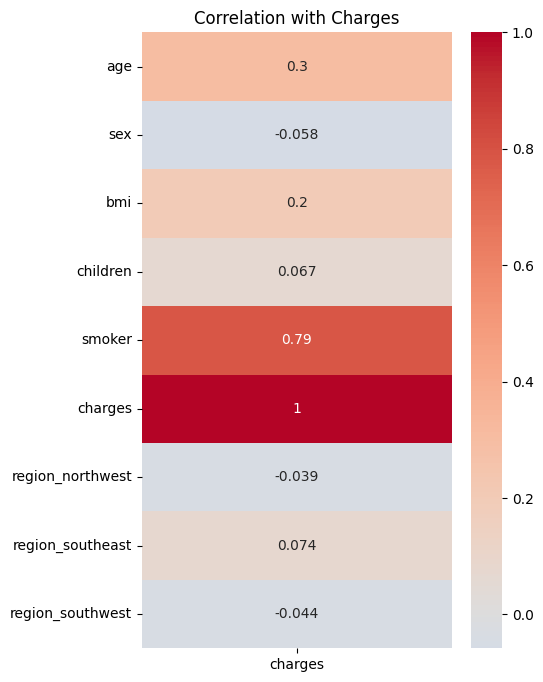

In [17]:
plt.figure(figsize=(5,8))
sns.heatmap(corr_charges, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation with Charges")
plt.show()


# Linear Regression Model

In [18]:
X = df.drop('charges',axis=1)
y = df['charges']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_pred = model.predict(X_test)

In [22]:
r2 =model.score(X_test,y_test)

In [23]:
print("R^2 :",r2)

R^2 : 0.8069287081198013


In [24]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"RMSE: {rmse}")

RMSE: 5956.342894363585


In [25]:
param_grid = {
    'n_estimators': [100, 200, 300],  # ลองใช้ 100, 200, และ 300 ต้น
    'max_depth': [10, 20, None],      # ลองใช้ความลึก 10, 20, และไม่จำกัด (None)
    'min_samples_split': [2, 5],      # ลองใช้ 2 และ 5 ตัวอย่าง
    'min_samples_leaf': [1, 2]        # ลองใช้ 1 และ 2 ตัวอย่าง
}

In [26]:
# ทำโมเดล Random Forest
rf = RandomForestRegressor(random_state=42)

In [27]:
# สร้าง GridSearchCV Object
# cv=5 หมายถึงการทำ Cross-Validation 5 folds
# scoring='neg_mean_squared_error' คือการ optimize เพื่อลดค่า MSE (หรือเพิ่มค่า R^2)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error', # Metric ใช้ประเมิน performance
    verbose=2,
    n_jobs=-1 # ใช้ทุก Core ของ CPU
)

In [28]:
# เริ่มการค้นหา (Training/Fitting)
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์
print("\nBest Parameters found:")
print(grid_search.best_params_)

print("\nBest Negative MSE Score:")
print(grid_search.best_score_)

Starting Grid Search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters found:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Best Negative MSE Score:
-23264138.10355157


In [29]:
# ดึงโมเดลที่ดีที่สุดจาก Grid Search
best_rf_model = grid_search.best_estimator_

# ทำนายผลบน Test Set
y_pred_tuned = best_rf_model.predict(X_test)

# ประเมินผลลัพธ์
r2_tuned = best_rf_model.score(X_test, y_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("--- Tuned Random Forest Results ---")
print(f"R^2 Score (Tuned): {r2_tuned:.4f}")
print(f"RMSE (Tuned): {rmse_tuned:.2f}")

# เปรียบเทียบกับผลลัพธ์เดิมที่ได้ 0.8788 และ 4718.99

--- Tuned Random Forest Results ---
R^2 Score (Tuned): 0.8905
RMSE (Tuned): 4485.47


# Visualization

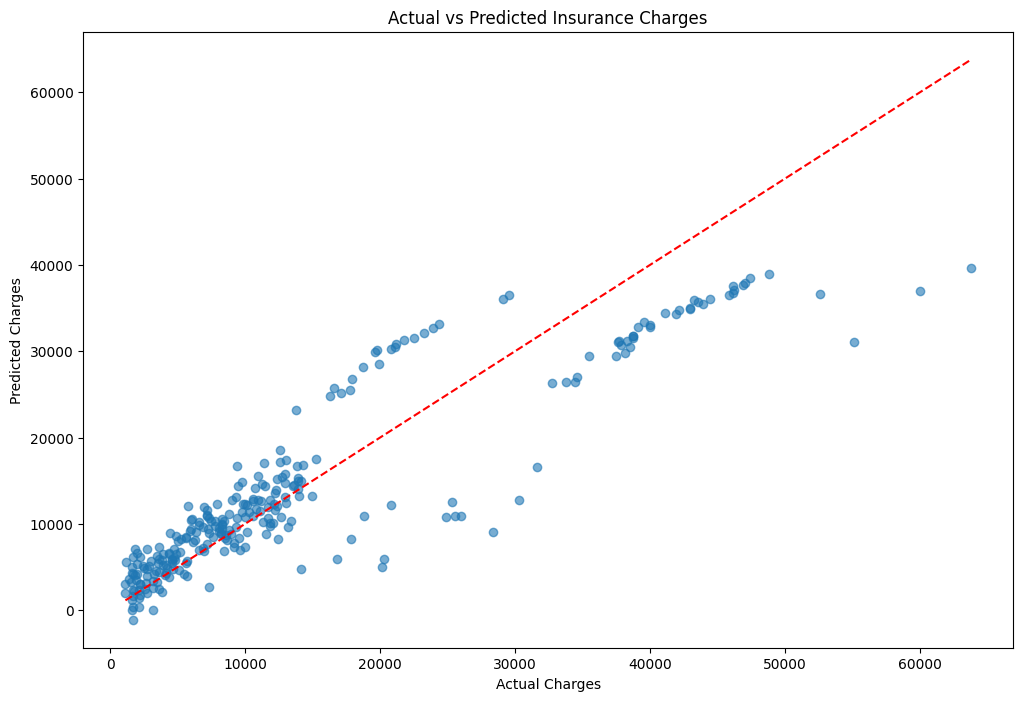

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # เส้น y=x
plt.show()

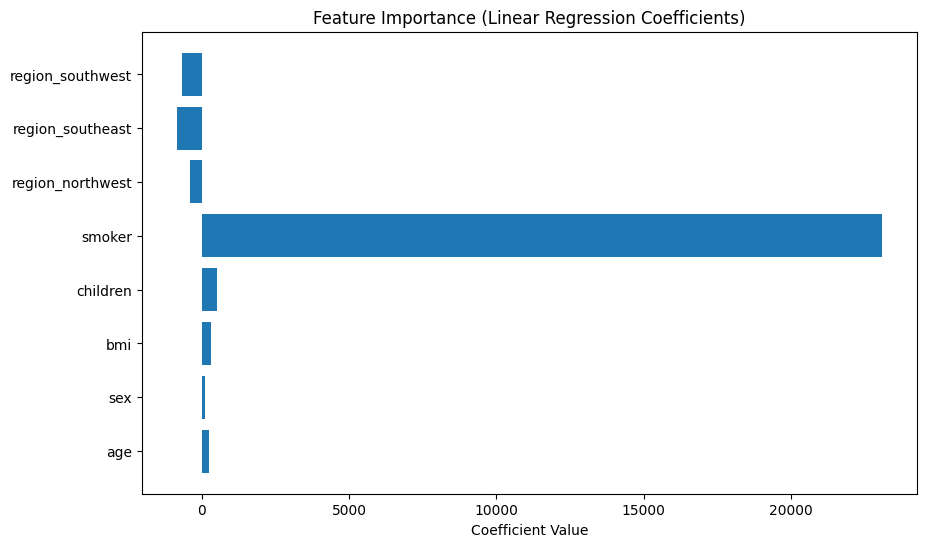

In [31]:
importance = model.coef_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


# smoker เป็น factor ที่ส่งผลต่อ charges เยอะสุด

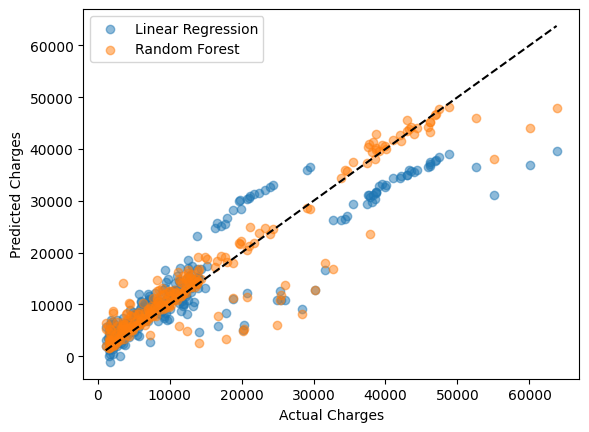

In [32]:
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_tuned, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()


In [33]:
print('\tRandom Forest vs Linear Regression:')
print(f'R^2 :\t {r2_tuned} : {r2}')
print(f'RMSE :\t {rmse_tuned} : {rmse}')

	Random Forest vs Linear Regression:
R^2 :	 0.8905102735301372 : 0.8069287081198013
RMSE :	 4485.465548751719 : 5956.342894363585


# เห็นได้ชัดว่า Random Forest (Tuned ใช้ GridSearchCV) อธิบายความแปรปรวนของข้อมูลและทำงานได้ดีกว่า 

## จาก chart แสดงให้เห็นว่าค่า charges มีการกระจายอยู่เบ้ขวา และค่ามัธยฐานอยู่ด้านซ้าย แสดงให้เห็นว่าคนส่วนมากมีค่าใช้จ่ายต่ำ

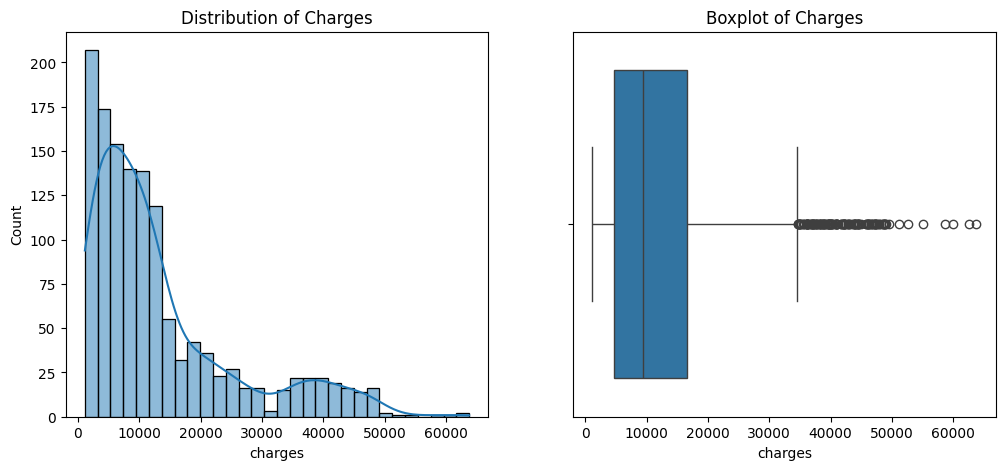

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['charges'], kde=True, bins=30)
plt.title("Distribution of Charges")

plt.subplot(1,2,2)
sns.boxplot(x=df['charges'])
plt.title("Boxplot of Charges")
plt.show()

# boxplot นี้ชี้ว่าคนที่สูบบุหรี่จะมีค่าใช้จ่ายสูงกว่าคนที่ไม่สูบบุหรี่อย่างเห็นได้ชัด

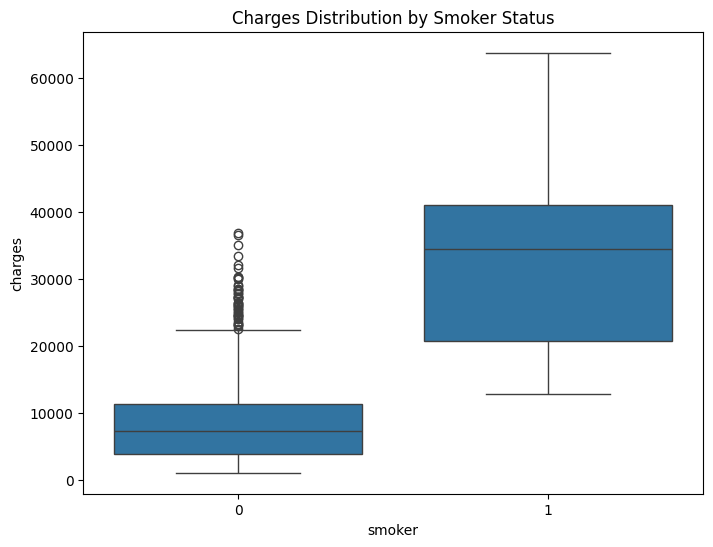

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges Distribution by Smoker Status")
plt.show()